## About This Project and the dataset
- I chose to do this project which is part of the Lets Grow More Virtual Internship Program to test and sharpen my skills in Supervised Machine Learning algorithms as I embark on the journey of becoming a data scientist.
- The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

## Objective
- The goal is to create a machine learning model that can learn from the measurements of these irises whose species are already known, so that we can predict the species for the new irises that she has found.

In [138]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

In [139]:
#the dataset
df=pd.read_csv("D:\Studies\Resume\Lets Grow More\Task 1\Iris Flower ML Project\\flower.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [130]:
# Before we start on building the ML model, lets first do some data exploration
df.shape

(150, 5)

- Now we know the dataset takes the shape of 150 rows and 5 columns

In [15]:
# number of species and their count
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

- The dataset has 3 Iris species namely: Setosa, Virginica and Versicolor, and each has a total of 50 Iris flowers.

<AxesSubplot:>

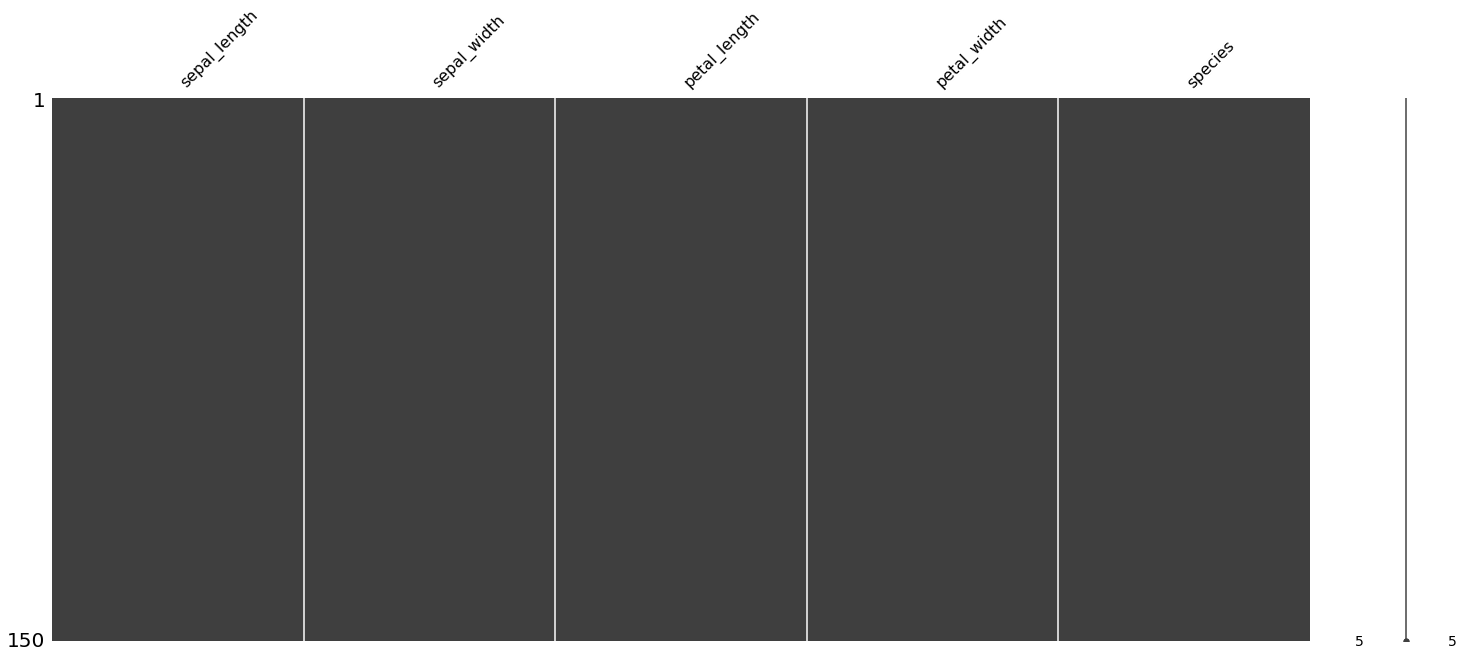

In [18]:
# does the dataset have any missing values?
msno.matrix(df)

- The missing values matrix allows us to see if the missing values follows any specific pattern in the dataset

In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- The dataset has no missing values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
#statistical summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- The average sepal length is 5.84333 centimeters and the average sepal width is 3.05400 centimeters 
- The average petal length is 3.758667 centimeters and the average petal width is 1.198667 centimeters

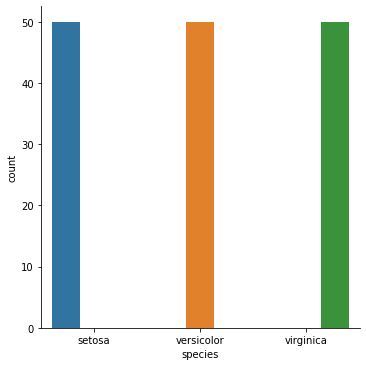

In [22]:
# catplot
sns.catplot(x = 'species', hue = 'species', kind = 'count', data = df)

A cat plot shows the relationship between a numerical and one or more categorical variables using one of several visual representations.
- There's a total of 50 observations for each species

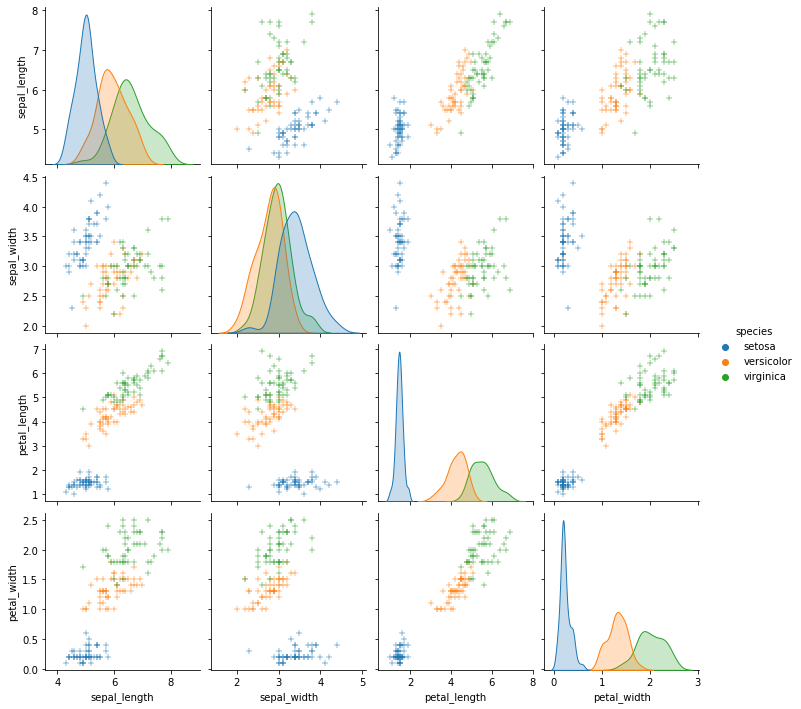

In [143]:
sns.pairplot(df, hue='species', markers='+')
plt.show()

- From the above, we can see that Iris-Setosa is separated from both other species in all the features.

- The species Virginica has the longest sepal length while Setosa has the shortest

- The species Virginica has the longest petal length while Setosa has the shortest

- The species Virginica has the widest petal width while Setosa has the shortest

- Setosa has the widest sepal width while Versicolor has the shortest

### Lets see a scatter plot distribution of sepal length vs sepal width

In [49]:
#scatter plot
colors = ['orange', 'green', 'blue']
species = ['virginica','versicolor','setosa']

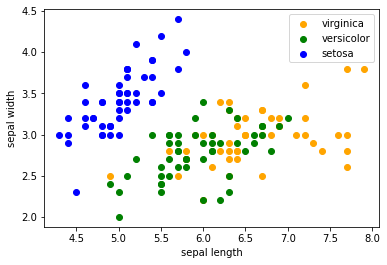

In [50]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

## Correlation

In [51]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


- Sepal length and petal length have a correlation coefficient of 0.871754 which means there is a fairly strong positive relationship between the two variables.
- Sepal width and petal length have a correlation coefficient of -0.420516. This is an indication that both variables move in the opposite direction.

<AxesSubplot:>

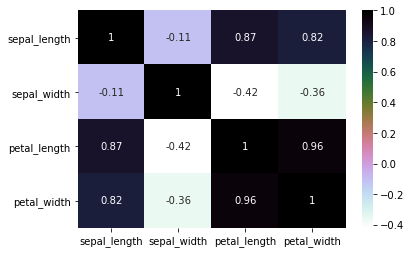

In [144]:
#heat map
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'cubehelix_r')

- A heat map enables us to visualize the correlation to understand it better

### Splitting the data into train and test sets

In [78]:
#drop species
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=10)

In [87]:
x_train.size

420

In [89]:
y_train.size

105

### Logistic Regression

In [91]:
model = LogisticRegression()

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
#Lets now fit the train datasets
model.fit(x_train, y_train)

LogisticRegression()

In [85]:
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [90]:
### Now Lets score the model that we have
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


### KNN Algorithm

In [92]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [93]:
# fit the train data
model.fit(x_train, y_train)

KNeighborsClassifier()

In [95]:
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (105, 4)
Training labels shape:  (105,)
Test data shape:  (45, 4)
Test labels shape:  (45,)


In [100]:
predictions= model.predict(x_test)

In [101]:
predictions

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        17
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



- We can attempt to improve the accuracy of our results by modifying the number of neighbours. This can be achieved using the elbow method.

In [108]:
#lets score our model first to see it accuracy
# checking the accurancy
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


- A score of 97.777... isn't bad but let's try improving it.
We first iterate through 40 neighbor values, instaniate a KNeighborsClassifier object with that number of neighbors. We can then fit the training data to this KNN model, get the predictions, and append the mean value between the predictions, pred_i and the correct values, y_test.
- Where pred_i and y_test do not match up in the array, a true value is returned which has a value of 1. The higher this number, the more inaccurate the classification will be.
The lower value for the error rate will correspond to a better performing model.
These results can be plotted using the range of i values on the x-axis, versus the error rate on the y-axis.

Text(0, 0.5, 'Error rate')

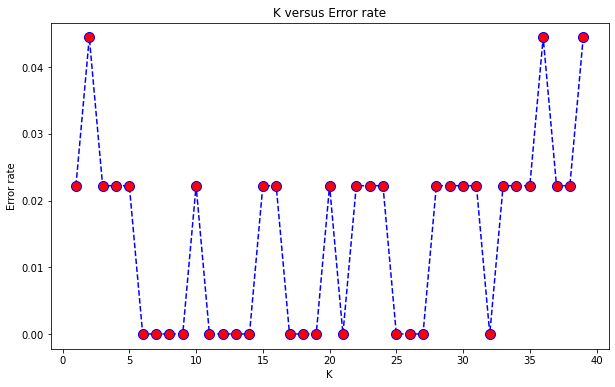

In [113]:
error_rate = []

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

- Now we can pick the lowest value of K which will return, the lowest error rate. Here, we can choose 5.

- We can now, re-run the accuracy assessment with the confusion matrix and the classification report once more, to see if we more accurately classify the misaligned points.

In [115]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
predictions= model.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        17
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Decision Tree

In [117]:
x_train.size

420

In [118]:
y_train.size

105

In [131]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [132]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [133]:
predictions= model.predict(x_test)

In [134]:
predictions

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [137]:
#checking the accurancy
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
